### I. Imports et chargement

In [ ]:
!pip install ultralytics

In [ ]:
import zipfile
import os
from ultralytics import YOLO
from PIL import Image as PILImage
from IPython.display import display
import matplotlib.pyplot as plt

In [1]:
#Download zip_dataset
from google.colab import files
uploaded = files.upload()

Saving Tire Dataset.v2i.yolov8.zip to Tire Dataset.v2i.yolov8.zip


### II. Préparation et vérification du jeu de données

In [ ]:
#Extract dataset
zip_path = 'Tire Dataset.v2i.yolov8.zip'
extract_path = '/content/dataset'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction terminée. Les fichiers sont dans :", extract_path)

Extraction terminée. Les fichiers sont dans : /content/dataset


In [3]:
#Rename valid in val
os.rename('/content/dataset/valid', '/content/dataset/val')

### III. Configuration du fichier data.yaml

In [ ]:
fixed_yaml = """
train: ../train/images
val: ../val/images
test: ../test/images

nc: 1
names: ['car-tire']

roboflow:
  workspace: iotml
  project: tire-dataset
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/iotml/tire-dataset/dataset/2
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(fixed_yaml)

### IV. Entraînement du modèle

In [ ]:
model = YOLO("yolov8m.pt")
model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=800)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 261MB/s]


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 13.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 62.1MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 1461 images, 7 backgrounds, 0 corrupt: 100%|██████████| 1461/1461 [00:00<00:00, 1484.57it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/val/labels... 190 images, 1 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<00:00, 1318.77it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.2G     0.8302      1.269      1.294         31        800: 100%|██████████| 92/92 [00:18<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        190        268      0.118      0.328     0.0675     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        12G     0.8814      1.153      1.316         64        800: 100%|██████████| 92/92 [00:16<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]


                   all        190        268      0.177      0.201       0.13     0.0489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.1G     0.8477      1.089      1.294         27        800: 100%|██████████| 92/92 [00:16<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]


                   all        190        268     0.0914       0.19     0.0385     0.0118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.1G     0.8123      1.042      1.265         27        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all        190        268       0.51      0.575      0.467        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.2G      0.746     0.9565      1.226         30        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.32it/s]


                   all        190        268      0.556      0.683      0.592      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.3G     0.7129     0.8849      1.195         35        800: 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all        190        268      0.662      0.703      0.649      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.3G     0.6808     0.8461      1.176         44        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.26it/s]


                   all        190        268      0.725      0.769      0.738      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.4G     0.6718     0.8378       1.17         62        800: 100%|██████████| 92/92 [00:16<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        190        268      0.746      0.821      0.802      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.5G     0.6529      0.815      1.148         33        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all        190        268      0.739       0.77      0.764      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.5G     0.6312     0.7776      1.135         35        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all        190        268      0.737      0.787      0.751      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.6G     0.6373     0.7655      1.139         48        800: 100%|██████████| 92/92 [00:16<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all        190        268      0.786      0.772      0.807       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.7G     0.6072     0.7323      1.122         32        800: 100%|██████████| 92/92 [00:16<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        190        268      0.829      0.817      0.832       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.7G     0.5918     0.7073      1.107         27        800: 100%|██████████| 92/92 [00:15<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.25it/s]

                   all        190        268      0.762      0.884      0.799      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.8G     0.5867     0.7194       1.12         32        800: 100%|██████████| 92/92 [00:16<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]

                   all        190        268      0.801      0.847      0.855       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.9G     0.6082     0.7282      1.119         31        800: 100%|██████████| 92/92 [00:15<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]

                   all        190        268      0.844      0.787      0.822      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.9G     0.5773     0.7069      1.102         32        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]


                   all        190        268      0.866      0.821      0.909      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        13G     0.5491     0.6544      1.084         30        800: 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]

                   all        190        268      0.797      0.866      0.847      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.1G     0.5805     0.6704      1.094         39        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        190        268      0.885      0.862      0.916      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.1G     0.5566     0.6369      1.088         23        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        190        268      0.816      0.866       0.89      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.2G      0.539     0.6345      1.075         35        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]

                   all        190        268      0.879      0.871      0.916      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.3G     0.5264     0.6219      1.065         32        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        190        268      0.853       0.89      0.903      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.3G     0.5464     0.6325      1.079         34        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all        190        268      0.774      0.888      0.843      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.4G     0.5444     0.6251      1.077         26        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]

                   all        190        268      0.786      0.892      0.849      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.5G     0.5255     0.5967      1.057         22        800: 100%|██████████| 92/92 [00:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all        190        268      0.828      0.883      0.913      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.5G      0.525     0.6239      1.058         72        800: 100%|██████████| 92/92 [00:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]

                   all        190        268      0.835      0.862      0.876      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.6G     0.5177     0.5754      1.061         35        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]

                   all        190        268      0.859      0.918      0.926      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.7G     0.5201     0.5932      1.058         30        800: 100%|██████████| 92/92 [00:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        190        268      0.911      0.915      0.947      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.7G     0.4885     0.5591      1.034         29        800: 100%|██████████| 92/92 [00:16<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]

                   all        190        268      0.889      0.898      0.938      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.8G     0.4953     0.5671      1.041         28        800: 100%|██████████| 92/92 [00:16<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all        190        268      0.883      0.817      0.895      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.9G     0.5029     0.5686      1.049         34        800: 100%|██████████| 92/92 [00:16<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all        190        268      0.843      0.919      0.922      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.9G     0.4821     0.5483      1.029         36        800: 100%|██████████| 92/92 [00:16<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all        190        268      0.847      0.918      0.933      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        14G     0.4784     0.5304      1.028         24        800: 100%|██████████| 92/92 [00:16<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        190        268      0.928      0.929       0.95      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      14.1G     0.4822     0.5555       1.04         27        800: 100%|██████████| 92/92 [00:16<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        190        268      0.898      0.922      0.955      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.1G     0.4721     0.5267      1.024         39        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all        190        268      0.893      0.925      0.948      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      14.2G     0.4624     0.5248      1.027         25        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        190        268      0.889      0.892      0.939      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      14.3G     0.4434     0.5016      1.016         35        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]

                   all        190        268      0.845      0.951      0.946      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      14.5G     0.4625     0.5183      1.027         37        800: 100%|██████████| 92/92 [00:16<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all        190        268      0.918       0.91      0.966      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      14.6G     0.4445     0.4968       1.01         33        800: 100%|██████████| 92/92 [00:16<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.50it/s]

                   all        190        268      0.943      0.918      0.966      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.8G     0.4459     0.4995      1.012         38        800: 100%|██████████| 92/92 [00:16<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]

                   all        190        268       0.91      0.942      0.954      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      15.1G     0.4309     0.4935      1.004         25        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]

                   all        190        268       0.89      0.892      0.944      0.596


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      15.2G     0.4655     0.4696      1.028         22        800: 100%|██████████| 92/92 [00:16<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        190        268      0.892      0.891      0.943      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        16G     0.4521     0.4478      1.018         14        800: 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]

                   all        190        268      0.917      0.863      0.948      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        16G     0.4414     0.4425       1.01         18        800: 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all        190        268      0.905      0.929      0.952      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      16.1G     0.4409      0.432      1.011         13        800: 100%|██████████| 92/92 [00:15<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        190        268      0.933      0.931      0.966      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      16.2G     0.4316     0.4123      1.002         15        800: 100%|██████████| 92/92 [00:15<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all        190        268      0.911      0.929      0.959      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      16.2G     0.4183     0.4046     0.9933         15        800: 100%|██████████| 92/92 [00:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all        190        268      0.881      0.963       0.96      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      16.3G     0.4063     0.3882     0.9884         16        800: 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        190        268      0.891      0.948      0.955      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      16.4G      0.397     0.3773     0.9816         17        800: 100%|██████████| 92/92 [00:15<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all        190        268      0.931       0.95      0.971      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      16.4G     0.3883     0.3665     0.9695         15        800: 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        190        268      0.914      0.925      0.963      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      16.5G     0.3834     0.3595     0.9727         14        800: 100%|██████████| 92/92 [00:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all        190        268      0.932      0.937      0.974       0.62



50 epochs completed in 0.252 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]


                   all        190        268      0.933      0.937      0.974      0.619
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a5e660b6cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
def display_img(path, width=800, title=None):
    img = PILImage.open(path)
    img = img.resize((width, int(img.height * width / img.width)))
    if title:
        print(f"{title}")
    display(img)

def display_img_list(folder, files, width=800):
    for filename, title in files:
        full_path = f"{folder}/{filename}"
        display_img(full_path, width=width, title=title)

Training Metrics Overview


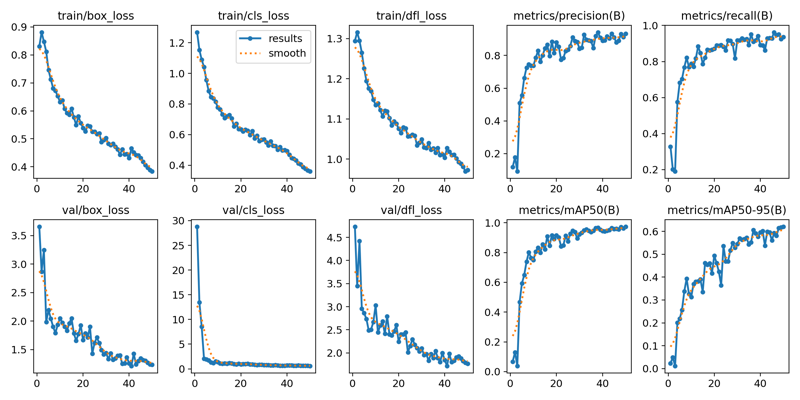

Precision-Recall Curve (Train)


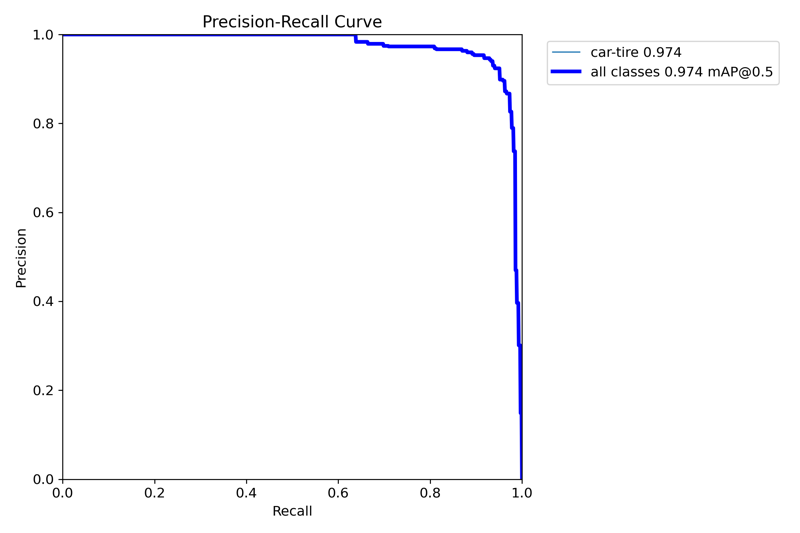

F1-Confidence Curve (Train)


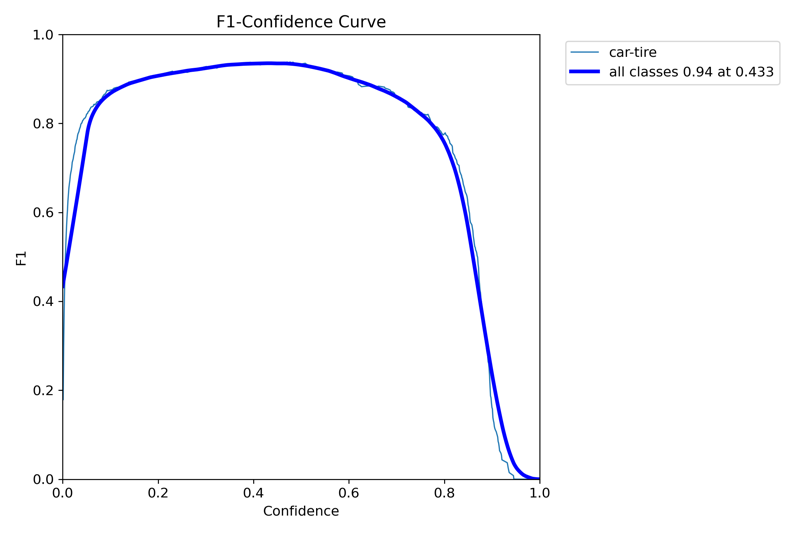

Confusion Matrix (Train)


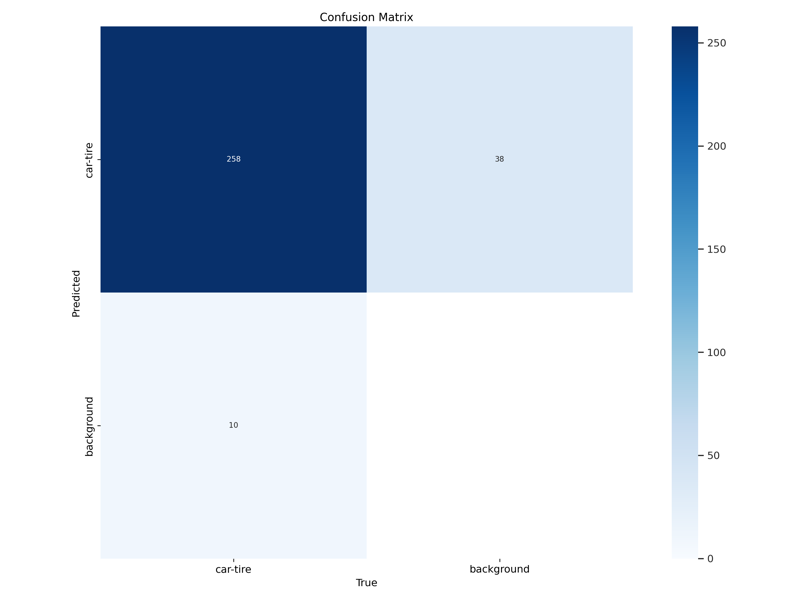

Label Distribution


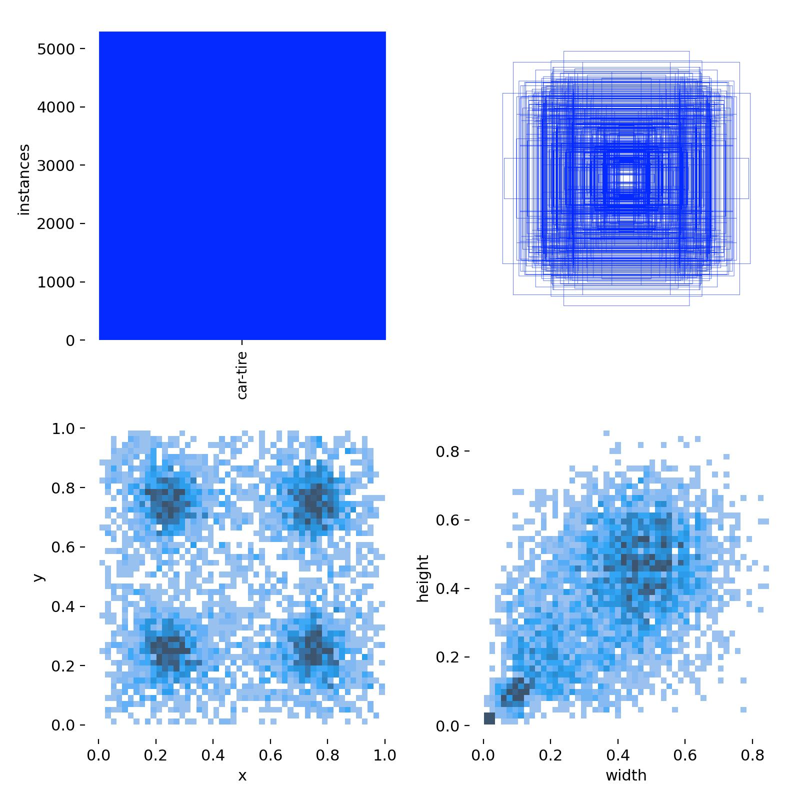

In [8]:
train_files = [
    ("results.png", "Training Metrics Overview"),
    ("PR_curve.png", "Precision-Recall Curve (Train)"),
    ("F1_curve.png", "F1-Confidence Curve (Train)"),
    ("confusion_matrix.png", "Confusion Matrix (Train)"),
    ("labels.jpg", "Label Distribution")
]

display_img_list("runs/detect/train", train_files)


### V. Evaluation du modèle sur le jeu de test

In [9]:
model = YOLO("runs/detect/train/weights/best.pt")
metrics = model.val(data="/content/dataset/data.yaml", split="test")

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/dataset/test/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 1517.09it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


                   all        103        154      0.969      0.916      0.973      0.617
Speed: 2.9ms preprocess, 5.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


F1-Confidence Curve (Test)


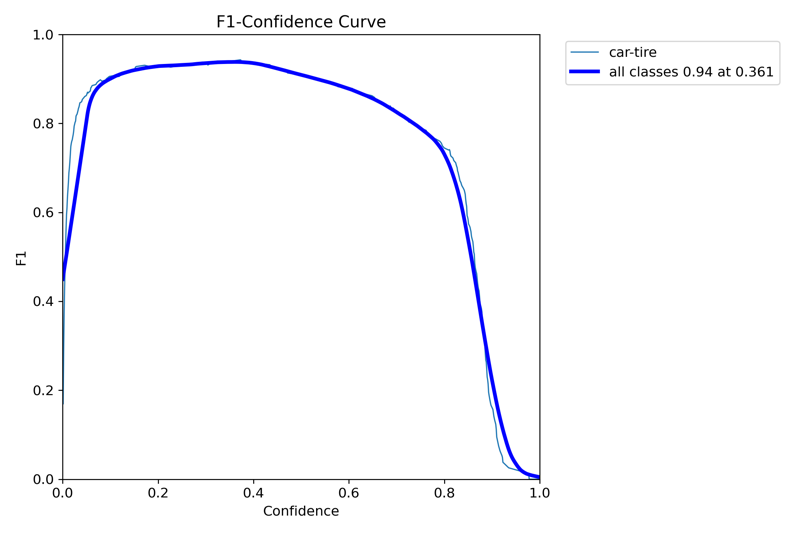

Precision-Recall Curve (Test)


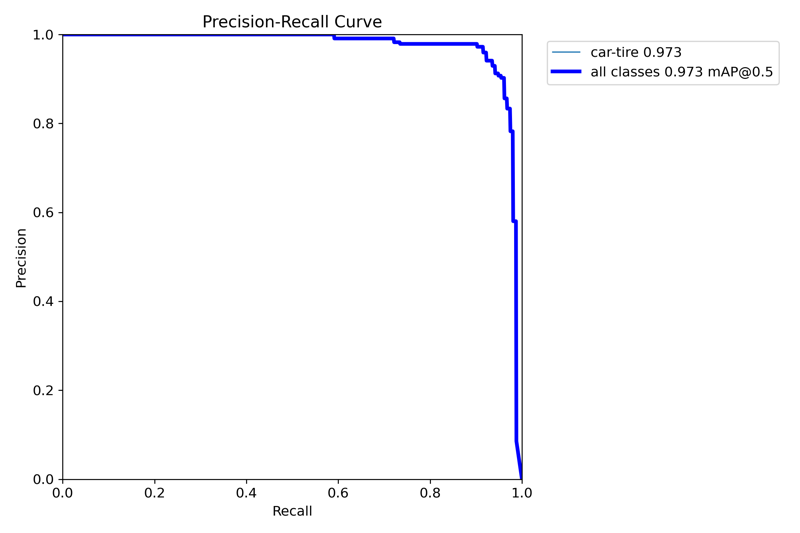

Confusion Matrix (Test)


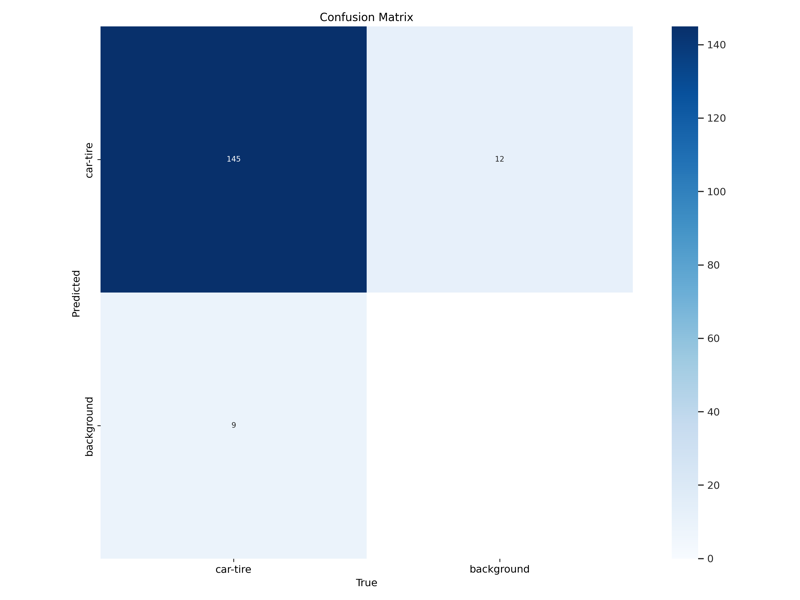

In [12]:
test_files = [
    ("F1_curve.png", "F1-Confidence Curve (Test)"),
    ("PR_curve.png", "Precision-Recall Curve (Test)"),
    ("confusion_matrix.png", "Confusion Matrix (Test)"),
]

display_img_list("runs/detect/val", test_files)

### VI. Comparaison des prédictions du modèle

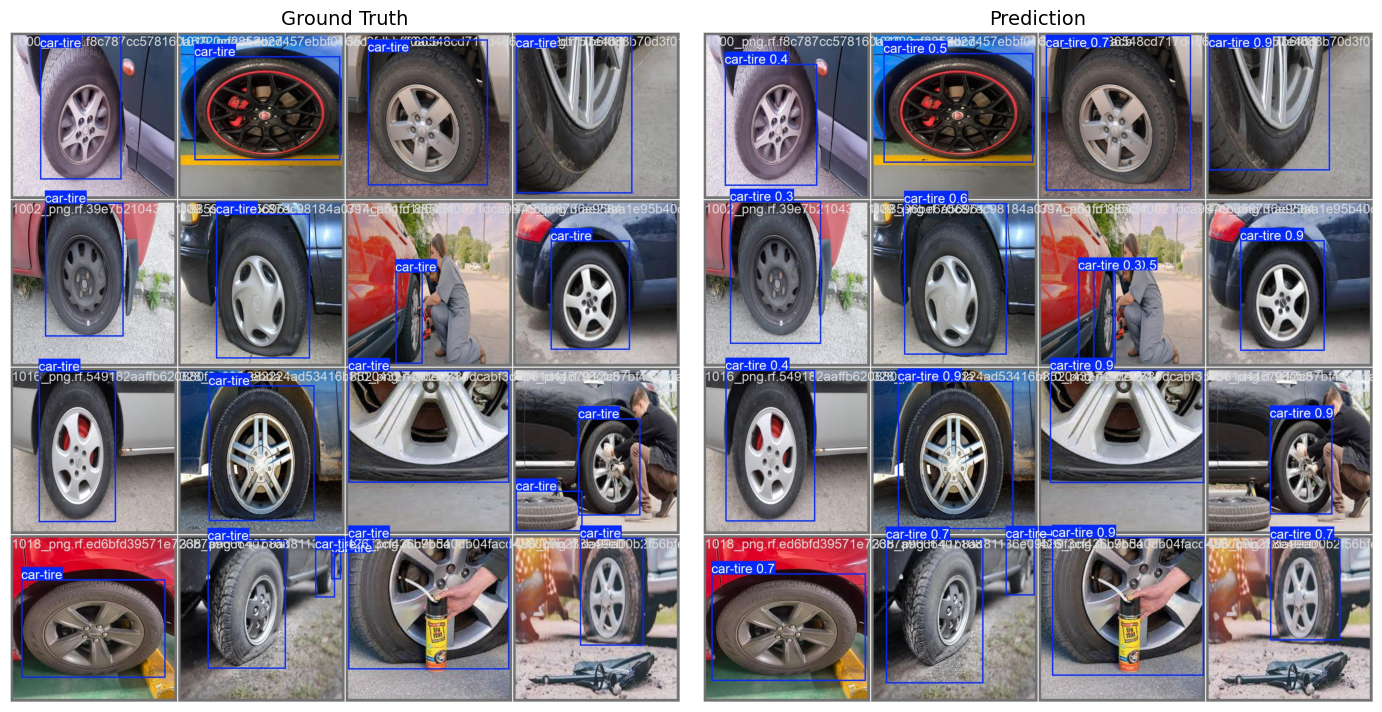

In [ ]:
def display_side_by_side(img1_path, img2_path, label1="Ground Truth", label2="Prediction"):
    img1 = Image.open(img1_path)
    img2 = Image.open(img2_path)

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    axs[0].imshow(img1)
    axs[0].set_title(label1, fontsize=14)
    axs[0].axis('off')

    axs[1].imshow(img2)
    axs[1].set_title(label2, fontsize=14)
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

display_side_by_side(
    "runs/detect/val/val_batch0_labels.jpg",
    "runs/detect/val/val_batch0_pred.jpg"
)
